In [2]:
import matplotlib as mpl
import time
import matplotlib.pyplot as plt
from qutip import *
from qutip.piqs import *
import numpy as np
import array
from tqdm import tqdm
from numpy import diff
import array

In [21]:
N = 2

g = 1

dg = 0.01

J = 0.5

h = np.ones(N)

sx_list, sy_list, sz_list = [], [], []
for i in range(N):
    op_list = [qeye(2)] * N
    op_list[i] = sigmax()
    sx_list.append(tensor(op_list))
    op_list[i] = sigmay()
    sy_list.append(tensor(op_list))
    op_list[i] = sigmaz()
    sz_list.append(tensor(op_list))
    
H = 0
for i in range(N):
    H -= sz_list[i]
    
for n in range(N - 1):
    H += -0.5 * sx_list[n] * sx_list[n + 1]
    H += -0.5  * sy_list[n] * sy_list[n + 1]
    H += -0.5  * sz_list[n] * sz_list[n + 1]

In [32]:
i = 100
gvec = np.linspace(0.1,1,i)
gnd = np.zeros(i)
e1 = np.zeros(i)
e2 = np.zeros(i)

In [33]:
j = 0
for g in tqdm(gvec):
    H1 =  (-(g) * H0 - J * Hint) 
    evals1, ekets1 = H1.eigenstates()
    e1[j] = evals1[0]
    e2[j] = evals1[1]
    j += 1

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.93it/s]


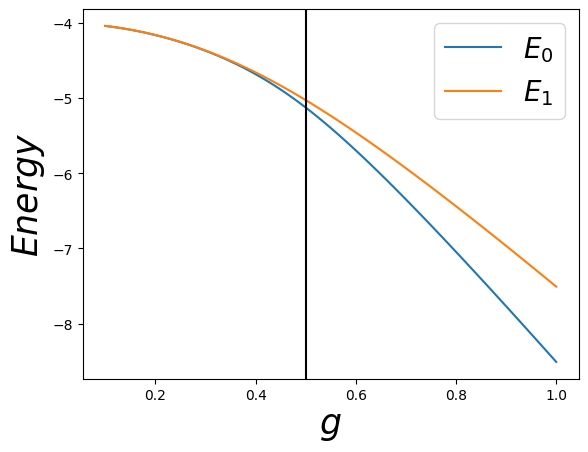

In [34]:
fig1 = plt.figure()

plt.plot(gvec, e1, '-' ,label = "$E_{0}$")
plt.plot(gvec, e2, '-' ,label = "$E_{1}$")
plt.ylabel(r'$Energy$', fontsize = 25)
plt.xlabel('$g$', fontsize = 25)
plt.legend(fontsize = 20)
plt.axvline(x=0.5, color = 'black')

In [35]:
dy = diff(e1)
dx = diff(gvec)
f1 = dy/dx
gvec1 = np.linspace(0.1,1,99)
f2 = -diff(f1)/diff(gvec1)
gvec2 = np.linspace(0.1,1,98)

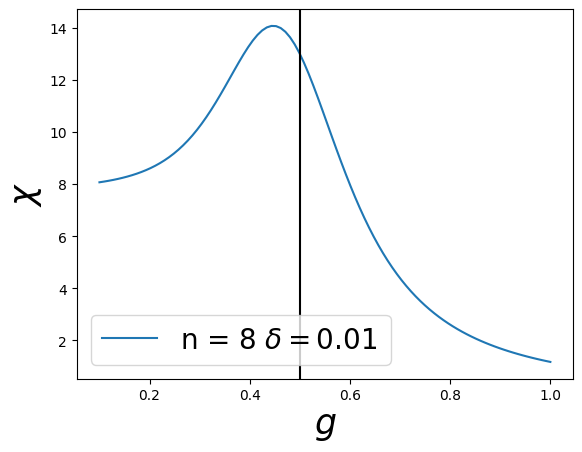

In [36]:
plt.plot(gvec2, f2, '-' ,label = "n = 8 $\delta = 0.01$ ")
plt.ylabel(r'$\chi$', fontsize = 25)
plt.xlabel(r'$g$', fontsize = 25)
plt.legend(fontsize = 20)
plt.axvline(x=0.5, color = 'black')